# Figure 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib as mpl

## Settings

In [2]:
TEXT_WIDTH = 6.7261  # in
DPI = 360

In [3]:
def set_font_size(font_size):
    plt.rc('font', size=font_size)          # controls default text sizes
    plt.rc('axes', titlesize=font_size)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_size, title_fontsize=font_size)    # legend fontsize
    plt.rc('figure', titlesize=font_size)   # fontsize of the figure title

In [4]:
sb.set(context='paper', style='whitegrid')
plt.rc('grid', linewidth=0.3)
sb.set_palette('colorblind')
set_font_size(6)

## Load Data

(822, 734, 4)


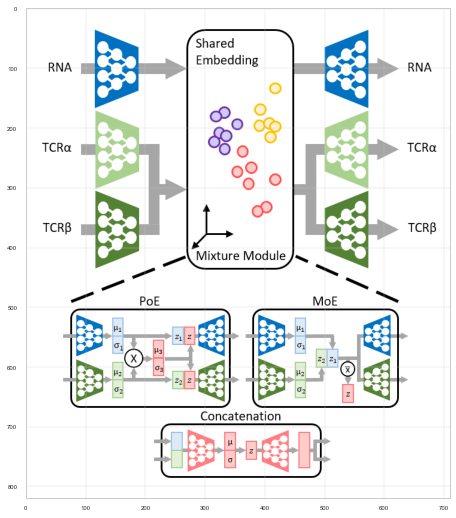

In [5]:
img_model = mpl.image.imread('../figures/concept_drawing.png')
print(img_model.shape)
fig, ax = plt.subplots(figsize=(9, 9))
img_model = img_model[0:819, 20:730]
ax.imshow(img_model)

### UMAPs

In [6]:
path_rna_1 = '../results/fig1_rna_d1.h5ad'
path_tcr_1 = '../results/fig1_tcr_d1.h5ad'
path_moe_1 = '../results/fig1_moe_d1.h5ad'
path_poe_1 = '../results/fig1_poe_d1.h5ad'
path_cc_1 = '../results/fig1_cc_d1.h5ad'

In [7]:
ad_rna_1 = sc.read(path_rna_1)
ad_tcr_1 = sc.read(path_tcr_1)
ad_moe_1 = sc.read(path_moe_1)
ad_poe_1 = sc.read(path_poe_1)
ad_cc_1 = sc.read(path_cc_1)

In [8]:
path_rna_2 = '../results/fig1_rna_d2.h5ad'
path_tcr_2 = '../results/fig1_tcr_d2.h5ad'
path_moe_2 = '../results/fig1_moe_d2.h5ad'
path_poe_2 = '../results/fig1_poe_d2.h5ad'
path_cc_2 = '../results/fig1_cc_d2.h5ad'

In [9]:
ad_rna_2 = sc.read(path_rna_2)
ad_tcr_2 = sc.read(path_tcr_2)
ad_moe_2 = sc.read(path_moe_2)
ad_poe_2 = sc.read(path_poe_2)
ad_cc_2 = sc.read(path_cc_2)

In [10]:
mapper = {'A1101_IVTDFSVIK_EBNA-3B_EBV_binder': 'IVTDFSVIK',
          'A0301_KLGGALQAK_IE-1_CMV_binder': 'KLGGALQAK',
          'A0201_GILGFVFTL_Flu-MP_Influenza_binder': 'GILGFVFTL',
          'A0201_ELAGIGILTV_MART-1_Cancer_binder': 'ELAGIGILTV', 
          'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder': 'AVFDRKSDAK',
          'A0201_GLCTLVAML_BMLF1_EBV_binder': 'GLCTLVAML',
          'A0301_RLRAEAQVK_EMNA-3A_EBV_binder': 'RLRAEAQVK',
          'B0801_RAKFKQLL_BZLF1_EBV_binder': 'RAKFKQLL'}

color_palette = {'RAKFKQLL': 'tab:green',
                 'GILGFVFTL': 'tab:orange',
                 'KLGGALQAK': 'tab:purple',
                 'GLCTLVAML': 'tab:red',
                 'AVFDRKSDAK': 'tab:blue',
                 'IVTDFSVIK': 'tab:olive', 
                 'ELAGIGILTV': 'tab:brown'
                 }

In [11]:
cp_clone = sb.color_palette('deep')

"""palette_clonotypes = {
    '-99': 'lightgray',
    '18840': 'tab:blue', #
    '2210': 'tab:orange', #
    '18847': 'tab:olive',
    '164': 'tab:red', #
    '18944': 'tab:purple', #
    '18937': 'tab:brown',
    '18932': 'tab:pink',
    '18864': 'tab:cyan',
    '19002': 'tab:green',
}"""

palette_clonotypes_d1 = {
    '-99': 'lightgray',
    '10': cp_clone[3], #
    '26': cp_clone[9], #
    '30': cp_clone[8],
    '86': cp_clone[6], #
    '1': cp_clone[5], #
    '164': cp_clone[4],
    '202': cp_clone[0],
    '52': cp_clone[2],
    '92': cp_clone[1],
}

for ad in [ad_rna_1, ad_tcr_1, ad_moe_1, ad_poe_1, ad_cc_1]:
    ad.uns['palette_clonotypes'] = palette_clonotypes_d1


palette_clonotypes_d2 = {
    '-99': 'lightgray',
    '18840': cp_clone[3], #
    '2210': cp_clone[9], #
    '18847': cp_clone[8],
    '164': cp_clone[6], #
    '18944': cp_clone[5], #
    '18937': cp_clone[4],
    '18932': cp_clone[0],
    '18864': cp_clone[2],
    '19002': cp_clone[1],
}

for ad in [ad_rna_2, ad_tcr_2, ad_moe_2, ad_poe_2, ad_cc_2]:
    ad.uns['palette_clonotypes'] = palette_clonotypes_d2

In [12]:
cp_clone = sb.color_palette('deep')
cp_clone[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

### 10x Data

In [13]:
dict_replace = {
    'concat': 'Concat',
    'moe': 'MoE',
    'poe': 'PoE',
    'tcr': 'TCR',
    'rna': 'RNA',
    
    'Prediction test': 'F1-Score',
    'NMI_cell_type': 'Cell Type',
    'NMI_reactivity': 'Reactivity',
    
    'MSLE_total': 'MSLE', 
    'R2_total': 'R2'
}

In [14]:
metrics_10x = ['Prediction test', 'NMI']
data_donor_1 = pd.read_csv('../results/performance_10x_donor_1.csv', index_col=0)
data_donor_1 = data_donor_1[data_donor_1['metrics'].isin(metrics_10x)]
data_donor_1['donor'] = 'Donor 1'

for old, new in dict_replace.items():
    data_donor_1.replace(old, new, inplace=True)

In [15]:
data_donor_2 = pd.read_csv('../results/performance_10x_donor_2.csv', index_col=0)
data_donor_2 = data_donor_2[data_donor_2['metrics'].isin(metrics_10x)]
data_donor_2['donor'] = 'Donor 2'

for old, new in dict_replace.items():
    data_donor_2.replace(old, new, inplace=True)

In [16]:
#data_10x = pd.concat([data_donor_1, data_donor_2], axis=0)

#for old, new in dict_replace.items():
#    data_10x.replace(old, new, inplace=True)

In [17]:
metrics_avidity = ['MSLE_total', 'R2_total']

data_avidity_1 = pd.read_csv('../results/performance_avidity_10x_donor_1.csv', index_col=0)
data_avidity_1 = data_avidity_1[data_avidity_1['metrics'].isin(metrics_avidity)]
data_avidity_1['donor'] = 'Donor 1'

for old, new in dict_replace.items():
    data_avidity_1.replace(old, new, inplace=True)

In [18]:
data_avidity_2 = pd.read_csv('../results/performance_avidity_10x_donor_2.csv', index_col=0)
data_avidity_2 = data_avidity_2[data_avidity_2['metrics'].isin(metrics_avidity)]
data_avidity_2['donor'] = 'Donor 2'

for old, new in dict_replace.items():
    data_avidity_2.replace(old, new, inplace=True)

### Covid Data

In [19]:
metrics_covid = ['NMI_cell_type', 'NMI_reactivity']
data_covid = pd.read_csv('../results/performance_covid.csv', index_col=0)
data_covid = data_covid[data_covid['metrics'].isin(metrics_covid)]

for old, new in dict_replace.items():
    data_covid.replace(old, new, inplace=True)

In [20]:
def normalize_score(data, row):
    score = row[1]['scores']

    normalizing_method = 'TCR'
    if row[1]['metrics'] == 'Cell Type':
        normalizing_method = 'RNA'
    
    normalizing_row = data[(data['split']==row[1]['split']) 
                          & (data['model']==normalizing_method)
                          & (data['metrics']==row[1]['metrics'])].iloc[0]
    normalizing_score = normalizing_row['scores']  
    return score / normalizing_score

data_covid_norm = data_covid.copy()
data_covid_norm['scores_normalized'] = [normalize_score(data_covid, el) for el in data_covid.iterrows()]
data_covid_norm = data_covid_norm[~((data_covid_norm['model']=='TCR')
                                    & (data_covid_norm['metrics']=='Reactivity'))]
data_covid_norm = data_covid_norm[~((data_covid_norm['model']=='RNA')
                                    & (data_covid_norm['metrics']=='Cell Type'))]

### TESSA test

In [21]:
data_tessa = pd.read_csv('../results/performance_tessa_10x_donor_1.csv', index_col=0)
data_beta = pd.read_csv('../results/performance_10x_donor_1_beta.csv', index_col=0)
data_performance_tessa_10x_1 = pd.concat([data_tessa, data_beta])
data_performance_tessa_10x_1 = data_performance_tessa_10x_1[data_performance_tessa_10x_1['metrics'].isin(metrics_10x)]
data_performance_tessa_10x_1['donor'] = 'Donor 1'

In [22]:
data_tessa = pd.read_csv('../results/performance_tessa_10x_donor_2.csv', index_col=0)
data_beta = pd.read_csv('../results/performance_10x_donor_2_beta.csv', index_col=0)
data_performance_tessa_10x_2 = pd.concat([data_tessa, data_beta])
data_performance_tessa_10x_2 = data_performance_tessa_10x_2[data_performance_tessa_10x_2['metrics'].isin(metrics_10x)]
data_performance_tessa_10x_2['donor'] = 'Donor 2'

In [23]:
data_tessa = pd.read_csv('../results/performance_tessa_covid.csv', index_col=0)
data_beta = pd.read_csv('../results/performance_covid_beta.csv', index_col=0)
data_performance_tessa_covid = pd.concat([data_tessa, data_beta])
data_performance_tessa_covid = data_performance_tessa_covid[data_performance_tessa_covid['metrics'].isin(metrics_covid)]

In [24]:
data_performance_tessa = pd.concat([#data_performance_tessa_10x_1,  
                                    data_performance_tessa_10x_2, 
                                    data_performance_tessa_covid])
dict_replace = {
    'Prediction test': '10x-F1',
    'NMI': '10x-NMI',
    'tessa': 'TESSA',
    'moe_beta': 'MoE',
    'NMI_cell_type': 'CT',
    'NMI_reactivity': 'Reactivity'
}

for old, new in dict_replace.items():
      data_performance_tessa.replace(old, new, inplace=True)

In [25]:
dict_replace = {
    'Prediction test': '10x-F1',
    'NMI': '10x-NMI',
    'tessa': 'TESSA',
    'moe_beta': 'MoE',
    'NMI_cell_type': 'CT',
    'NMI_reactivity': 'Reactivity'
}

for old, new in dict_replace.items():
    data_performance_tessa_10x_1.replace(old, new, inplace=True)
    data_performance_tessa_10x_2.replace(old, new, inplace=True)

### Statistical Testing

In [26]:
from scipy.stats import ttest_rel

In [27]:
def get_10x_p_values(df_perf):
    p_values_knn = {}

    for model_greater in ['RNA', 'TCR', 'MoE', 'PoE', 'Concat']:
        knn = df_perf[df_perf['metrics']=='F1-Score']

        p_values_knn[model_greater] = {}

        for model_less in ['RNA', 'TCR']:
            x = knn[knn['model']==model_less].sort_values(['donor', 'split'])
            x = x['scores'].values

            y = knn[knn['model']==model_greater].sort_values(['donor', 'split'])
            y = y['scores'].values

            p = ttest_rel(x, y, alternative='less')[1]
            p_values_knn[model_greater][model_less] = p
    p_values_nmi = {}

    for model_greater in ['RNA', 'TCR', 'MoE', 'PoE', 'Concat']:
        knn = df_perf[df_perf['metrics']=='NMI']

        p_values_nmi[model_greater] = {}

        for model_less in ['RNA', 'TCR']:
            x = knn[knn['model']==model_less].sort_values(['donor', 'split'])
            x = x['scores'].values

            y = knn[knn['model']==model_greater].sort_values(['donor', 'split'])
            y = y['scores'].values

            p = ttest_rel(x, y, alternative='less')[1]
            p_values_nmi[model_greater][model_less] = p
    return {'F1-Score': p_values_knn, 'NMI': p_values_nmi}

p_values_d1 = get_10x_p_values(data_donor_1)
p_values_d2 = get_10x_p_values(data_donor_2)

In [28]:
def get_avidity_p_values(df_perf):
    p_values_msle = {}

    for model_greater in ['RNA', 'TCR', 'MoE', 'PoE', 'Concat']:
        knn = df_perf[df_perf['metrics']=='MSLE']

        p_values_msle[model_greater] = {}

        for model_less in ['RNA', 'TCR']:
            x = knn[knn['model']==model_less].sort_values(['donor', 'split'])
            x = x['scores'].values

            y = knn[knn['model']==model_greater].sort_values(['donor', 'split'])
            y = y['scores'].values

            p = ttest_rel(x, y, alternative='greater')[1]
            p_values_msle[model_greater][model_less] = p
    p_values_r2 = {}

    for model_greater in ['RNA', 'TCR', 'MoE', 'PoE', 'Concat']:
        knn = df_perf[df_perf['metrics']=='NMI']

        p_values_r2[model_greater] = {}

        for model_less in ['RNA', 'TCR']:
            x = knn[knn['model']==model_less].sort_values(['donor', 'split'])
            x = x['scores'].values

            y = knn[knn['model']==model_greater].sort_values(['donor', 'split'])
            y = y['scores'].values

            p = ttest_rel(x, y, alternative='less')[1]
            p_values_r2[model_greater][model_less] = p
    return {'MSLE': p_values_msle, 'R2': p_values_r2}

p_avidity_d1 = get_avidity_p_values(data_avidity_1)
p_avidity_d2 = get_avidity_p_values(data_avidity_2)

In [29]:
p_values_covid = {'Cell Type': {}, 'Reactivity': {}}

for model_greater in ['MoE', 'PoE', 'Concat']:
    knn = data_covid_norm[data_covid_norm['metrics']=='Cell Type']

    x = knn[knn['model']=='TCR'].sort_values(['split'])
    x = x['scores'].values

    y = knn[knn['model']==model_greater].sort_values(['split'])
    y = y['scores'].values

    p = ttest_rel(x, y, alternative='less')[1]
    p_values_covid['Cell Type'][model_greater] = p

for model_greater in ['MoE', 'PoE', 'Concat']:
    knn = data_covid_norm[data_covid_norm['metrics']=='Reactivity']

    x = knn[knn['model']=='RNA'].sort_values(['split'])
    x = x['scores'].values

    y = knn[knn['model']==model_greater].sort_values(['split'])
    y = y['scores'].values

    p = ttest_rel(x, y, alternative='less')[1]
    p_values_covid['Reactivity'][model_greater] = p

for metric in ['Cell Type', 'Reactivity']:
    for model in ['TCR', 'RNA']:
        p_values_covid[metric][model] = -99
p_values_covid

{'Cell Type': {'MoE': 0.09028343355585598,
  'PoE': 0.08948292697466916,
  'Concat': 0.08537933239693071,
  'TCR': -99,
  'RNA': -99},
 'Reactivity': {'MoE': 0.000419731198807472,
  'PoE': 0.03045000684177527,
  'Concat': 0.04339404371677778,
  'TCR': -99,
  'RNA': -99}}

In [30]:
def get_tessa_p_values(df_perf):
    p_values_tessa = {}
    for met in df_perf['metrics'].unique():
        df_metric = df_perf[df_perf['metrics']==met]

        x = df_metric[df_metric['model']=='TESSA'].sort_values(['split'])
        x = x['scores'].values

        y = df_metric[df_metric['model']=='MoE'].sort_values(['split'])
        y = y['scores'].values

        p = ttest_rel(x, y, alternative='less')[1]
        p_values_tessa[met] = p
    return p_values_tessa
p_values_tessa_d1 = get_tessa_p_values(data_performance_tessa_10x_1)
p_values_tessa_d2 = get_tessa_p_values(data_performance_tessa_10x_2)
p_values_tessa = get_tessa_p_values(data_performance_tessa)

In [31]:
def p_2_sign(val):
    if val == -99:
        return ''
    if val < 0.001:
        return '***'
    if val < 0.01:
        return '**'
    if val < 0.05:
        return '*'
    else:
        return ''

## Plot Image

In [32]:
palette = {
    'RNA': sb.color_palette()[0],
    'TCR': sb.color_palette()[1],
    'MoE': sb.color_palette()[2],
    'PoE': sb.color_palette()[3],
    'Concat': sb.color_palette()[4],
    'TESSA': sb.color_palette()[5],
}

In [33]:
def plot_image(img, ax):
   # pos_full = mpl.transforms.Bbox([[0, 0.1], [0.5, 1]])
    #ax.set_position(pos_full)
    ax.imshow(img, origin='upper', aspect=1)
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)
    ax.set(ylabel=None)
    ax.set_xticks([])
    ax.set_yticks([])

In [34]:
def plot_empty(ax):
    ax.axis('off')

### Umaps

In [49]:
def plot_umap(adata, grouping, ax, legend=None, vmin=None, vmax=None, ylabel=None, xlabel=None, size=0.2):
    xy = adata.obsm['X_umap']
    colors = adata.obs[grouping].values
    if vmin is not None:
        colors = np.clip(colors, vmin, vmax)
    
    palette = None
    if grouping != 'large_clonotype':
        palette = 'viridis'
    if grouping == 'binding_name':
        colors = [mapper[el] for el in list(colors)]
        palette = color_palette
    if grouping == 'large_clonotype':
        palette = adata.uns['palette_clonotypes']
    
    plot = sb.scatterplot(x=xy[:, 0], y=xy[:, 1], ax=ax, hue=colors, s=size, linewidth=0, palette=palette)
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)
    ax.set_yticks([])
    ax.set_xticks([])
    
    if legend is not None:
        # todo change back axis position
        ax.legend(markerscale=0.5, fontsize='x-small', loc='right', bbox_to_anchor=(1.6, 0.5), frameon=False)
    else:
        ax.legend([], [], frameon=False)
    
    if ylabel is not None:
        ax.text(0, 0.5, ylabel, size='large', weight='bold', rotation=90, 
                verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)
    if xlabel is not None:
        ax.text(0.5, 1., xlabel, size='large', weight='bold', 
                verticalalignment='bottom', horizontalalignment='center', transform=ax.transAxes)

In [36]:
def plot_colorbar(adata, gene, ax, vmin=None, vmax=None):
    palette = 'viridis'
    colors = adata.obs[gene].values
    norm = plt.Normalize(colors.min(), colors.max())
    if vmin is not None:
        norm = plt.Normalize(vmin, vmax)
    sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])

    plt.colorbar(sm, label=None, cax=ax)
    ax.grid(False)
    sb.despine(ax=ax, left=True, bottom=True)

In [37]:
def plot_umap_axis(ax, offset=0):
    ax.arrow(x=0.09-offset, y=0.07-offset, dx=0, dy=0.17, color='black', width=0.001,
             head_width=0.02, head_length=0.02, clip_on=False,
             length_includes_head=True, zorder=1, transform=ax.transAxes) 
    ax.arrow(x=0.09-offset, y=0.07-offset, dx=0.16, dy=0, color='black', width=0.001, 
             head_width=0.02, head_length=0.02, clip_on=False,
             length_includes_head=True, zorder=1, transform=ax.transAxes) 
    ax.text(0.07-offset, 0-offset, 'UMAP1', size='x-small', transform=ax.transAxes)
    ax.text(0.01-offset, 0.07-offset, 'UMAP2', size='x-small', rotation=90, transform=ax.transAxes)

### Boxplots

In [38]:
def plot_10x_barplot(data_10x, p_values, ax, ylabel='Specificity', scale=1.05):
    plot = sb.boxplot(data=data_10x, x='metrics', y='scores', hue='model', 
                      hue_order=order, palette=palette,
                      ax=ax)
    plot.set(xlabel=None, ylabel=ylabel)
    ax.get_legend().remove()
        
    label_locs = ax.get_xticks()
    label_names = [el.get_text() for el in ax.get_xticklabels()]
    labels = dict(zip(label_names, label_locs)) 
    bar_width = 0.8/5
    
    y_pos = ax.get_ylim()[1]#*1.03
    
    for met, p_values in p_values.items():
        for mod in data_10x['model'].unique():
            p_rna = p_values[mod]['RNA']
            p_tcr = p_values[mod]['TCR']
            p_sign = f'{p_2_sign(p_rna)}\n{p_2_sign(p_tcr)}'
            #p_sign = p_sign.replace('-', '')
            if p_sign != '-\n-':
                x_pos = labels[met] - 2*bar_width + order.index(mod)*bar_width
                ax.text(x_pos, y_pos, p_sign, size='medium', weight='bold', linespacing=0.5,
                        verticalalignment='center', horizontalalignment='center')    
    x_pos = 0 - 2.4 * bar_width
    ax.text(x_pos, y_pos*scale, 'RNA\nTCR', size='small', verticalalignment='top', horizontalalignment='center')
    ax.grid(False)
    sb.despine(ax=ax)

In [39]:
def plot_covid_barplot(ax):
    plot = sb.boxplot(data=data_covid_norm, x='metrics', y='scores_normalized', hue='model', 
                      hue_order=order, palette=palette,
                      ax=ax)
    label_locs = ax.get_xticks()
    label_names = [el.get_text() for el in ax.get_xticklabels()]
    labels = dict(zip(label_names, label_locs)) 
    bar_width = 0.8/5
    
    y_pos = ax.get_ylim()[1]*1.03
    
    for met in data_covid_norm['metrics'].unique():
        for mod in data_covid_norm['model'].unique():
            p = p_values_covid[met][mod]
            p_sign = p_2_sign(p)
            if p_sign != '-':
                x_pos = labels[met] - 2*bar_width + order.index(mod)*bar_width
                ax.text(x_pos, y_pos, p_sign, size='medium', weight='bold',
                        verticalalignment='top', horizontalalignment='center')
    
    
    plot.set(xlabel=None, ylabel='Normalized NMI')
    
    handles, labels = [(a + b) for a, b in zip(ax_d.get_legend_handles_labels(), ax_f.get_legend_handles_labels())]
    ax.legend(handles[:-1], labels[:-1], loc='upper center', ncol=6, bbox_to_anchor=(-0.1, 1.175), frameon=False)
    
    ax.text(0-2.5*bar_width, y_pos, 'TCR', size='small', verticalalignment='top', horizontalalignment='center')
    ax.text(0+3.5*bar_width, y_pos, 'RNA', size='small', verticalalignment='top', horizontalalignment='center')

    ax.grid(False)
    sb.despine(ax=ax)

In [40]:
def plot_tessa(data, p_values, ax, do_legend=False):    
    plot = sb.boxplot(data=data, y='scores', x='metrics', hue='model', 
                      hue_order=['TESSA', 'MoE'], palette=palette,
                      ax=ax)
    
    label_locs = ax.get_xticks()
    label_names = [el.get_text() for el in ax.get_xticklabels()]
    labels = dict(zip(label_names, label_locs)) 
    
    bar_width = 0.2
    y_pos = ax.get_ylim()[1]*1.03
    
    for m, p in p_values.items():
        p_sign = p_2_sign(p)
        if p_sign != '-':
            x_pos = labels[m] + bar_width
            ax.text(x_pos, y_pos, p_sign, size='medium', weight='bold',
                    verticalalignment='top', horizontalalignment='center')
    
    ax.get_legend().remove()
    # ax.tick_params(axis='x', which='major', pad=-2)
    plot.set(xlabel=None, ylabel=None)
    
    x_pos = -0.1
    if do_legend:
           x_pos = -0.3
    ax.text(x_pos, y_pos, 'TESSA', size='small', verticalalignment='top', horizontalalignment='center')
    
    if do_legend:
        handles, labels = [(a + b) for a, b in zip(ax_c.get_legend_handles_labels(), ax_f.get_legend_handles_labels())]
        ax.legend(handles[:-1], labels[:-1], loc='upper center', ncol=6, bbox_to_anchor=(-0.75, 1.175), frameon=False)
    
    ax.grid(False)
    sb.despine(ax=ax)

In [41]:
cp = sb.color_palette('deep')
grays = sb.color_palette('Greys', n_colors=5)

palette = {
    'RNA': grays[0],   # cp[5],
    'TCR': grays[1],  #cp[4],
    'MoE': cp[2],  #cp[8],
    'PoE': cp[4],  #cp[0],
    'Concat': cp[1],  #cp[9],
    'TESSA': grays[2], #cp[7],
}

In [42]:
order = ['RNA', 'TCR', 'Concat', 'PoE', 'MoE']

C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

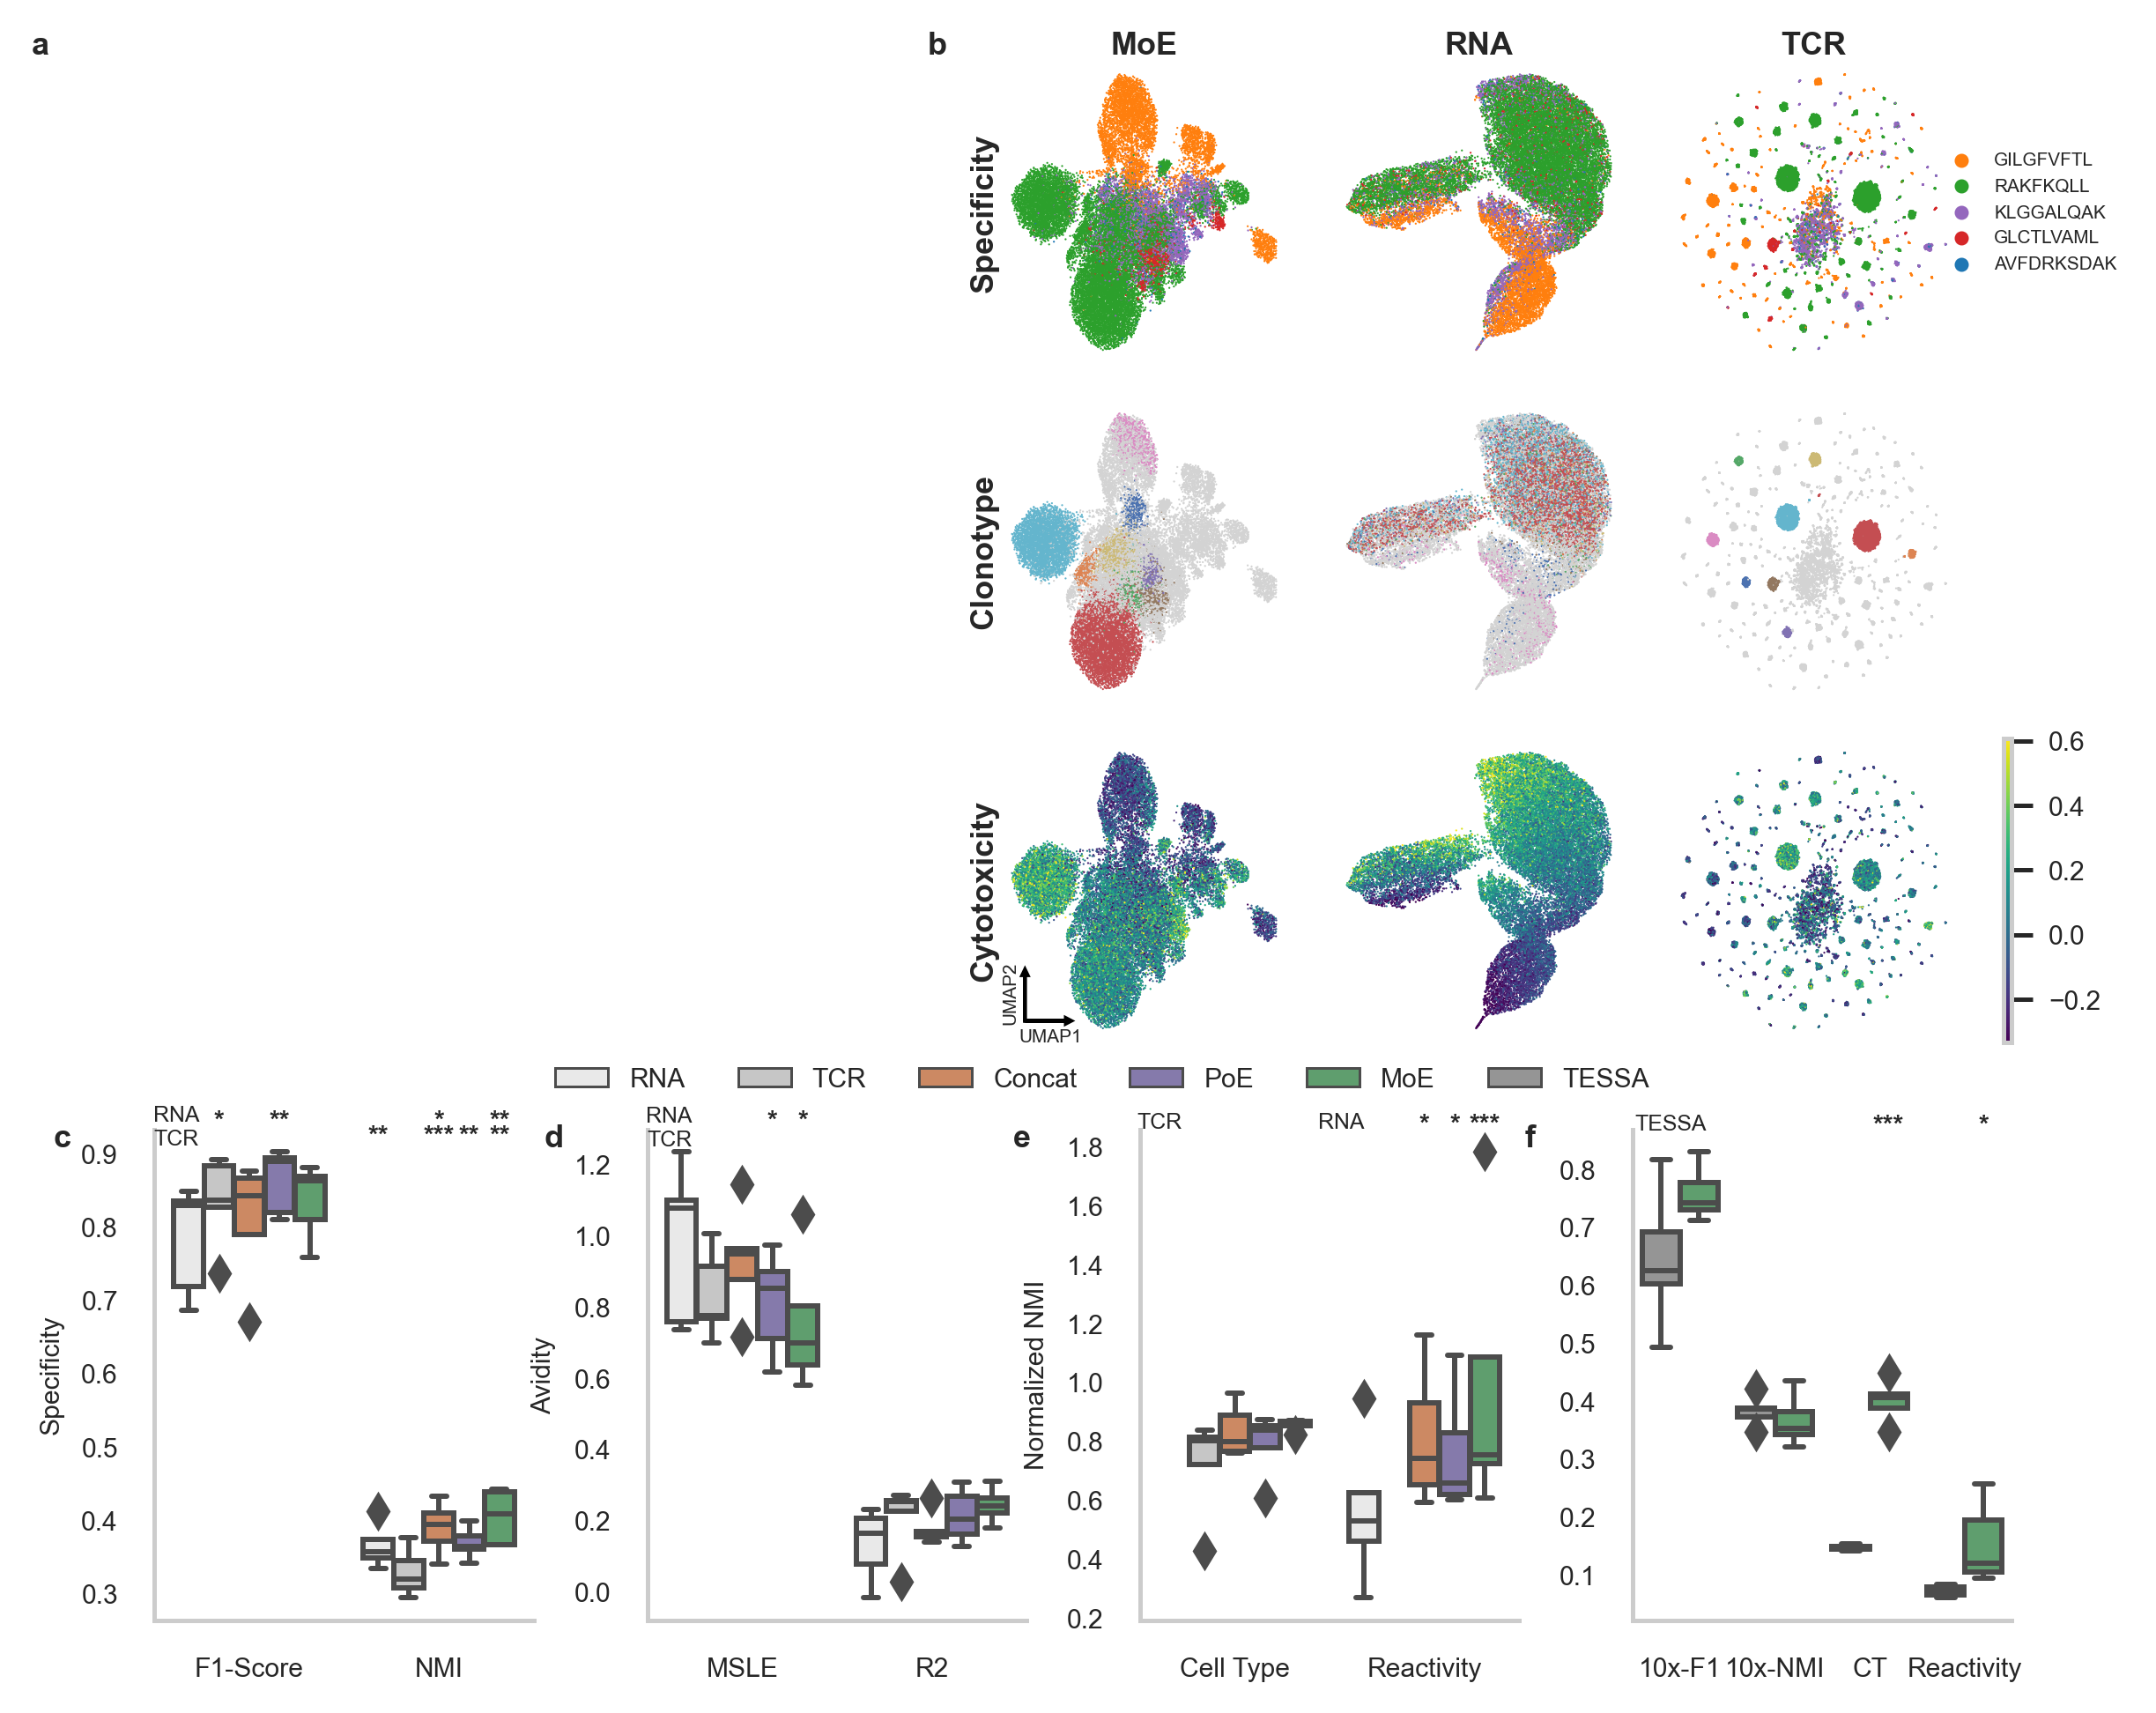

In [51]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 0.8),
                 dpi=DPI)
gridspecs = {}

#a    bbb
#     bbb
#     bbb
#c  d  e

# a=Sketch, b=UMAPs, c=10x, d=Covid, e=Tessa


gridspecs["gs_abcde"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=2,
    ncols=1,
    height_ratios=[2, 1],
    width_ratios=[1],
    #wspace=0.1,
    #left=0.00,
    #right=1,
    #top=1,
    #bottom=0,
)

gridspecs["gs_ab"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_abcde"][0],
    nrows=1,
    ncols=2,
    height_ratios=[1],
    width_ratios=[2, 3],
    #wspace=0.05,
)

gridspecs["gs_b"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_ab"][1],
    nrows=3,
    ncols=4,
    height_ratios=[1, 1, 1],
    width_ratios=[1, 1, 1, 0.03],
)


gridspecs["gs_cdef"] = mpl.gridspec.GridSpecFromSubplotSpec(
    subplot_spec=gridspecs["gs_abcde"][1],
    nrows=1,
    ncols=4,
    height_ratios=[1],
    width_ratios=[1, 1, 1, 1],
    wspace=0.3
)


ax_a = fig.add_subplot(gridspecs["gs_ab"][0])

ax_b = {}
for i in range(12):
    ax_b[i] = fig.add_subplot(gridspecs["gs_b"][i])

ax_c = fig.add_subplot(gridspecs["gs_cdef"][0])
ax_d = fig.add_subplot(gridspecs["gs_cdef"][1])
ax_e = fig.add_subplot(gridspecs["gs_cdef"][2])
ax_f = fig.add_subplot(gridspecs["gs_cdef"][3])

#plot_image(img_model, ax_a)
plot_empty(ax_a)

plot_umap(ad_moe_2, 'binding_name', ax_b[0], ylabel='Specificity', xlabel='MoE')
plot_umap(ad_rna_2, 'binding_name', ax_b[1], xlabel='RNA')
plot_umap(ad_tcr_2, 'binding_name', ax_b[2], legend=True, xlabel='TCR')
ax_b[3].axis('off')

plot_umap(ad_moe_2, 'large_clonotype', ax_b[4], ylabel='Clonotype')
plot_umap(ad_rna_2, 'large_clonotype', ax_b[5])
plot_umap(ad_tcr_2, 'large_clonotype', ax_b[6])
ax_b[7].axis('off')

lower, upper = np.percentile(ad_rna_2.obs['cd8 cytotoxic_score'], [1, 99])
plot_umap(ad_moe_2, 'cd8 cytotoxic_score', ax_b[8], vmin=lower, vmax=upper, ylabel='Cytotoxicity')
plot_umap(ad_rna_2, 'cd8 cytotoxic_score', ax_b[9], vmin=lower, vmax=upper)
plot_umap(ad_tcr_2, 'cd8 cytotoxic_score', ax_b[10], vmin=lower, vmax=upper)
plot_colorbar(ad_moe_2, 'cd8 cytotoxic_score', ax_b[11], vmin=lower, vmax=upper)

plot_umap_axis(ax_b[8])


plot_10x_barplot(data_donor_2, p_values_d2, ax_c, scale=1.035)
plot_10x_barplot(data_avidity_2, p_avidity_d2, ax_d, ylabel='Avidity') #todo
plot_tessa(data_performance_tessa, p_values_tessa, ax_f)

plot_covid_barplot(ax_e)

fig.text(0.01, 0.97, 'a', size='large', weight='bold')
fig.text(0.43, 0.97, 'b', size='large', weight='bold')
fig.text(0.02, 0.33, 'c', size='large', weight='bold')
fig.text(0.25, 0.33, 'd', size='large', weight='bold')
fig.text(0.47, 0.33, 'e', size='large', weight='bold')
fig.text(0.71, 0.33, 'f', size='large', weight='bold')


fig.tight_layout()
fig.savefig('../figures/012_overview_performance.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/012_overview_performance.png',
           dpi=DPI, bbox_inches='tight')

## Supplementary Figure 1

C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
C:\Users\felix.drost\Anaconda3\envs\mvTCR\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested seque

FileNotFoundError: [Errno 2] No such file or directory: 'figures/s01_umap_d1.pdf'

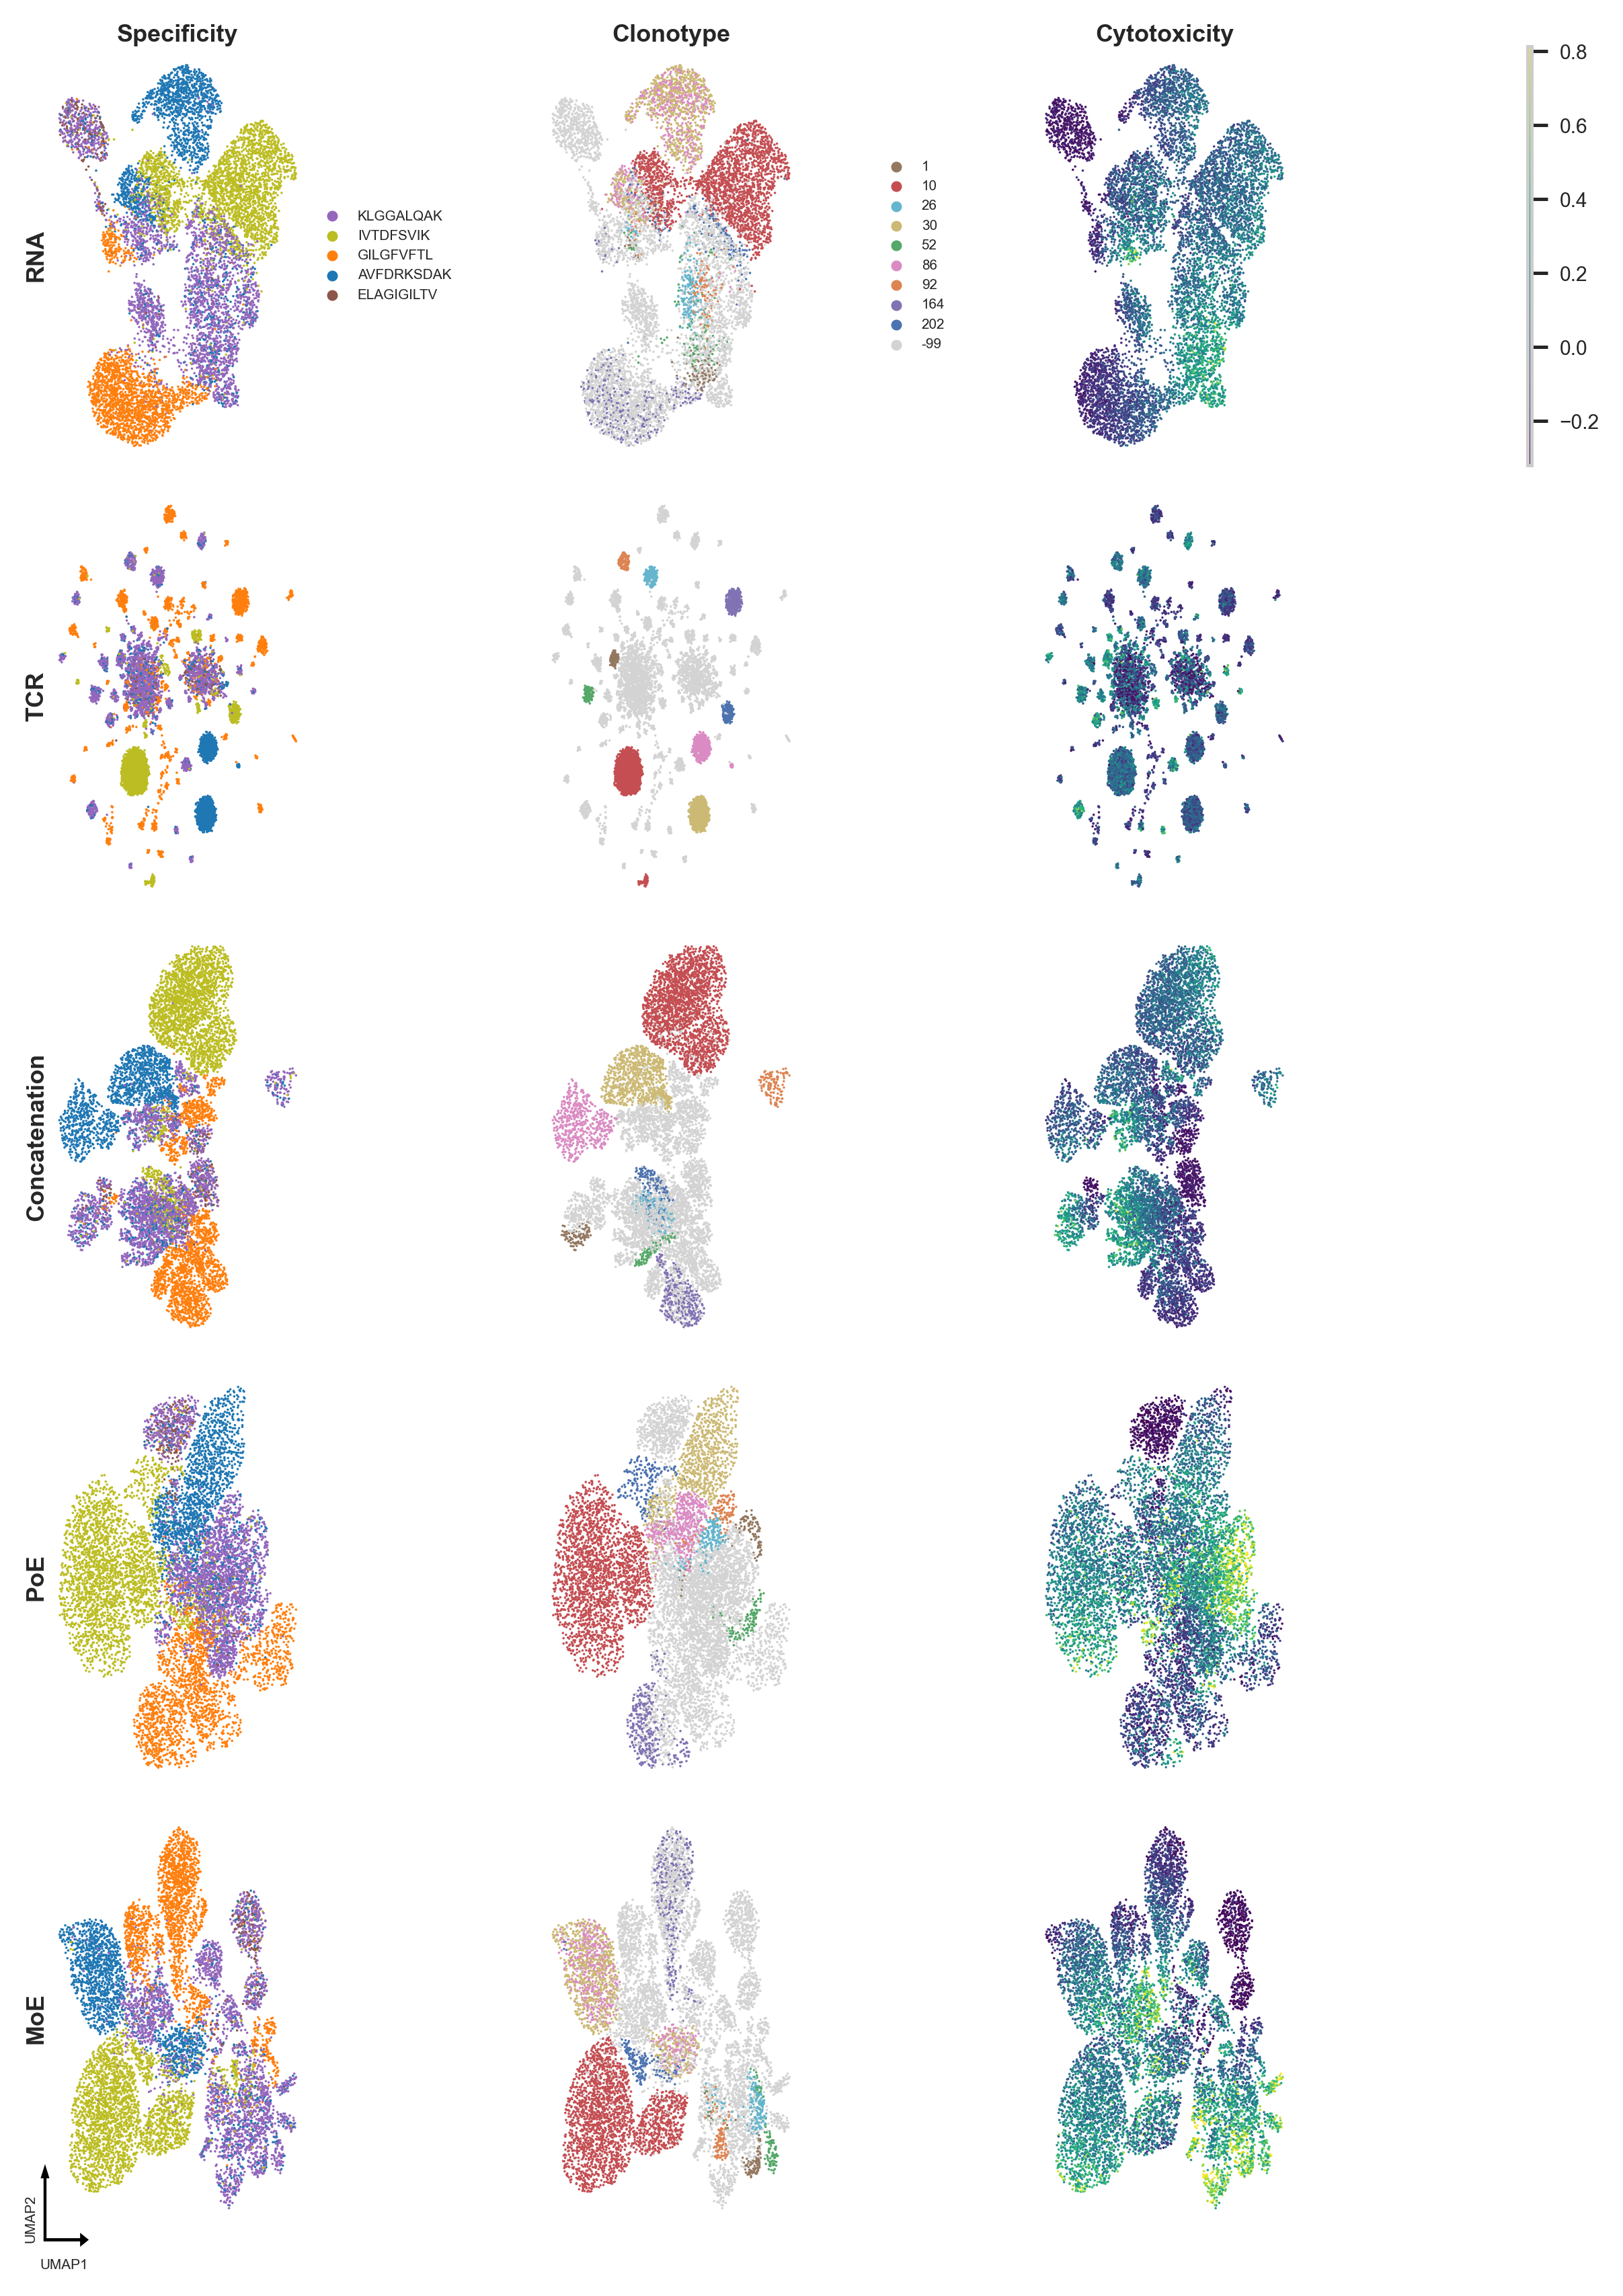

In [50]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 1.4),
                 dpi=DPI)
gridspecs = {}

# bbbbb
# bbbbb
# bbbbb
#  cdf

# b=UMAPs, c=10x, e=Tessa

gridspecs["gs_b"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=5,
    ncols=4,
    height_ratios=[1, 1, 1, 1, 1],
    width_ratios=[1, 1, 1, 0.015],
)



ax_b = {}
for i in range(20):
    ax_b[i] = fig.add_subplot(gridspecs["gs_b"][i])

lower, upper = np.percentile(ad_rna_1.obs['cd8 cytotoxic_score'], [1, 99])

plot_umap(ad_rna_1, 'binding_name', ax_b[0], ylabel='RNA', xlabel='Specificity', legend=True, size=0.5)
plot_umap(ad_rna_1, 'large_clonotype', ax_b[1], xlabel='Clonotype', legend=True, size=0.5)
plot_umap(ad_rna_1, 'cd8 cytotoxic_score', ax_b[2], xlabel='Cytotoxicity', size=0.5)
plot_colorbar(ad_rna_1, 'cd8 cytotoxic_score', ax_b[3], vmin=lower, vmax=upper)

plot_umap(ad_tcr_1, 'binding_name', ax_b[4], ylabel='TCR', size=0.5)
plot_umap(ad_tcr_1, 'large_clonotype', ax_b[5], size=0.5)
plot_umap(ad_tcr_1, 'cd8 cytotoxic_score', ax_b[6], size=0.5)
ax_b[7].axis('off')
#plot_colorbar(ad_tcr_1, 'cd8 cytotoxic_score', ax_b[7], vmin=lower, vmax=upper)

plot_umap(ad_cc_1, 'binding_name', ax_b[8], ylabel='Concatenation', size=0.5)
plot_umap(ad_cc_1, 'large_clonotype', ax_b[9], size=0.5)
plot_umap(ad_cc_1, 'cd8 cytotoxic_score', ax_b[10], size=0.5)
ax_b[11].axis('off')
#plot_colorbar(ad_cc_1, 'cd8 cytotoxic_score', ax_b[11], vmin=lower, vmax=upper)

plot_umap(ad_poe_1, 'binding_name', ax_b[12], ylabel='PoE', size=0.5)
plot_umap(ad_poe_1, 'large_clonotype', ax_b[13], size=0.5)
plot_umap(ad_poe_1, 'cd8 cytotoxic_score', ax_b[14], vmin=lower, vmax=upper, size=0.5)
#plot_colorbar(ad_poe_1, 'cd8 cytotoxic_score', ax_b[15], vmin=lower, vmax=upper)
ax_b[15].axis('off')

plot_umap(ad_moe_1, 'binding_name', ax_b[16], ylabel='MoE', size=0.5)
plot_umap(ad_moe_1, 'large_clonotype', ax_b[17], size=0.5)
plot_umap(ad_moe_1, 'cd8 cytotoxic_score', ax_b[18], vmin=lower, vmax=upper, size=0.5)
#plot_colorbar(ad_moe_1, 'cd8 cytotoxic_score', ax_b[19], vmin=lower, vmax=upper)
ax_b[19].axis('off')


plot_umap_axis(ax_b[16], offset=0.1)

fig.tight_layout()
fig.savefig('../figures/s01_umap_d1.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/s01_umap_d1.png',
           dpi=DPI, bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 0.3),
                 dpi=DPI)
gridspecs = {}

# abc

# b=UMAPs, c=10x, e=Tessa


gridspecs["gs_abc"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=1,
    ncols=3,
    height_ratios=[1],
    width_ratios=[1, 1, 1],
    wspace=0.3
)

ax_a = fig.add_subplot(gridspecs["gs_abc"][0])
ax_b = fig.add_subplot(gridspecs["gs_abc"][1])
ax_c = fig.add_subplot(gridspecs["gs_abc"][2])

plot_10x_barplot(data_donor_1, p_values_d1, ax_a, scale=1.025)
plot_10x_barplot(data_avidity_1, p_avidity_d1, ax_b, scale=1.06)
plot_tessa(data_performance_tessa_10x_1, p_values_tessa_d1, ax_c, do_legend=True)

fig.text(0.07, 0.90, 'a', size='large', weight='bold')
fig.text(0.35, 0.90, 'b', size='large', weight='bold')
fig.text(0.63, 0.90, 'c', size='large', weight='bold')


fig.tight_layout()
fig.savefig('../figures/s02_performance_d1.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/s02_performance_d1.png',
           dpi=DPI, bbox_inches='tight')

## Supplementary Figure 3

In [ ]:
fig = plt.figure(figsize=(TEXT_WIDTH, TEXT_WIDTH * 1.4),
                 dpi=DPI)
gridspecs = {}

# bbbbb
# bbbbb
# bbbbb
#  cdf

# b=UMAPs, c=10x, e=Tessa

gridspecs["gs_b"] = mpl.gridspec.GridSpec(
    figure=fig,
    nrows=5,
    ncols=4,
    height_ratios=[1, 1, 1, 1, 1],
    width_ratios=[1, 1, 1, 0.015],
)



ax_b = {}
for i in range(20):
    ax_b[i] = fig.add_subplot(gridspecs["gs_b"][i])

lower, upper = np.percentile(ad_rna_2.obs['cd8 cytotoxic_score'], [1, 99])

plot_umap(ad_rna_2, 'binding_name', ax_b[0], ylabel='RNA', xlabel='Specificity', legend=True)
plot_umap(ad_rna_2, 'large_clonotype', ax_b[1], xlabel='Clonotype', legend=True)
plot_umap(ad_rna_2, 'cd8 cytotoxic_score', ax_b[2], xlabel='Cytotoxicity')
plot_colorbar(ad_rna_2, 'cd8 cytotoxic_score', ax_b[3], vmin=lower, vmax=upper)

plot_umap(ad_tcr_2, 'binding_name', ax_b[4], ylabel='TCR')
plot_umap(ad_tcr_2, 'large_clonotype', ax_b[5])
plot_umap(ad_tcr_2, 'cd8 cytotoxic_score', ax_b[6])
#plot_colorbar(ad_tcr_2, 'cd8 cytotoxic_score', ax_b[7], vmin=lower, vmax=upper)
ax_b[7].axis('off')

plot_umap(ad_cc_2, 'binding_name', ax_b[8], ylabel='Concatenation')
plot_umap(ad_cc_2, 'large_clonotype', ax_b[9])
plot_umap(ad_cc_2, 'cd8 cytotoxic_score', ax_b[10])
#plot_colorbar(ad_cc_2, 'cd8 cytotoxic_score', ax_b[11], vmin=lower, vmax=upper)
ax_b[11].axis('off')

plot_umap(ad_poe_2, 'binding_name', ax_b[12], ylabel='PoE')
plot_umap(ad_poe_2, 'large_clonotype', ax_b[13])
plot_umap(ad_poe_2, 'cd8 cytotoxic_score', ax_b[14], vmin=lower, vmax=upper)
#plot_colorbar(ad_poe_2, 'cd8 cytotoxic_score', ax_b[15], vmin=lower, vmax=upper)
ax_b[15].axis('off')

plot_umap(ad_moe_2, 'binding_name', ax_b[16], ylabel='MoE')
plot_umap(ad_moe_2, 'large_clonotype', ax_b[17])
plot_umap(ad_moe_2, 'cd8 cytotoxic_score', ax_b[18], vmin=lower, vmax=upper)
#plot_colorbar(ad_moe_2, 'cd8 cytotoxic_score', ax_b[19], vmin=lower, vmax=upper)
ax_b[19].axis('off')


plot_umap_axis(ax_b[16], offset=0.1)

fig.tight_layout()
fig.savefig('../figures/s03_performance_d2.pdf',
           dpi=DPI, bbox_inches='tight')
fig.savefig('../figures/s03_performance_d2.png',
           dpi=DPI, bbox_inches='tight')

## Values

In [ ]:
data_donor_1.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_donor_2.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_donor_2.head()

In [ ]:
data_avidity_1.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_avidity_2.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_covid_norm.groupby(['model', 'metrics'])['scores_normalized'].mean()

In [ ]:
p_values_tessa

In [ ]:
p_values_tessa_d1

In [ ]:
p_values_tessa_d2

In [ ]:
data_performance_tessa_10x_1.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
data_performance_tessa.groupby(['model', 'metrics'])['scores'].mean()

In [ ]:
p_values_d1

In [ ]:
p_values_d2